# Herkenning van handgeschreven cijfers met CNN

## Convolutionele Neurale Netwerken

- Minor AAI - Hogeschool van Amsterdam
- Docenten:  Michiel Bontenbal & Maarten Post
- Vrijdag 16 februari 2024

### Boek & tutorials:

**Deep Learning with Python - Francois Chollet - Chapter 8**
- https://learning-oreilly-com.rps.hva.nl/library/view/deep-learning-with/9781617296864/

**Tutorials**
- https://keras.io/examples/vision/mnist_convnet/ 
- https://www.geeksforgeeks.org/applying-convolutional-neural-network-on-mnist-dataset/ 

## Importeer libraries

In [88]:
#import libraries. Ignore a potential tensorflow warning.

#Import keras methods. Study this for a moment, as this is important
from keras import models, layers, datasets

#These are the layers in the deep learning model
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout

#import numpy and matplotlib 
import numpy as np
import matplotlib.pyplot as plt

#import a tensorflow utensil
from tensorflow.keras.utils import to_categorical

## Verover de data

In [89]:
#load dataset from Keras and split into train and test sets
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [90]:
train_images.shape

(60000, 28, 28)

In [91]:
train_labels.shape

(60000,)

## Prepareer de images

* normalizeren --> pixel waardes tussen 0.0 en 1.0
* reshapen --> extra dimensie!

In [92]:
train_images.shape

(60000, 28, 28)

In [93]:
train_images_normalized = train_images.astype('float32')/255

In [94]:
train_images_enhanced = train_images_normalized.reshape(60000,28,28,1)

In [95]:
train_images_enhanced.shape

(60000, 28, 28, 1)

The label is: 5


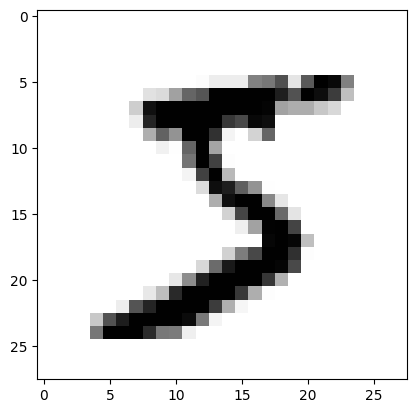

In [96]:
#show the first image
import matplotlib.pyplot as plt
image = train_images[0]
plt.imshow(image, cmap=plt.cm.binary)
plt.show
print(f'The label is: {train_labels[0]}')

In [97]:
#Check the pixelvalues of the image
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

### Oefening 1: Doe hetzelfde met de test images als wat hierboven met de train images is gedaan.

In [98]:
# YOUR CODE HERE
test_images_normalized = test_images.astype(float)/255

In [99]:
# Reshape the test_images_normalized array
test_images_enhanced = test_images_normalized.reshape(10000, 28, 28, 1)

In [100]:
# YOUR CODE HERE
test_images_enhanced.shape

(10000, 28, 28, 1)

## Prepareer de labels

### OEFENING 2: Zet de labels om naar vectoren met 'one-hot encoding'. 

One-hot encoding of ook wel categorical-encoding wordt gebruikt om van het label (een categorie) een 1D-array (vector) te maken. 

Lees eventueel meer door te zoeken op www.phind.com

Hint: zoek op ```to_categorical``` in de keras documentatie.

In [101]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [102]:
# Encode train and test labels
train_labels_encoded = to_categorical(train_labels)
test_labels_encoded = to_categorical(test_labels)


In [103]:
train_labels_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [104]:
test_labels_encoded

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Maak het CNN-model

### OEFENING 3: voeg nog 1 Conv2D + Pooling toe en nog 1 Dense laag toe

In [105]:
### OEFENING 3: voeg nog 1 Conv2D + Pooling toe en nog 1 Dense laag toe
cnn = models.Sequential()

cnn.add(Conv2D(filters=32,
                  kernel_size=(3, 3),
                  activation='relu', 
                  input_shape=(28,28,1)))

cnn.add(MaxPooling2D(pool_size=(2, 2)))

#YOUR CODE EDIT HERE
cnn.add(Conv2D(filters=64,
               kernel_size=(3, 3),
               activation='relu'))

cnn.add(Flatten())
cnn.add(Dropout(0.5))

# YOUR CODE EDIT HERE
cnn.add(Dense(units=64, activation='relu'))
cnn.add(Dense(units=32, activation='relu')) 
cnn.add(Dense(units=10, activation = 'softmax'))

In [106]:
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 flatten_3 (Flatten)         (None, 7744)              0         
                                                                 
 dropout_3 (Dropout)         (None, 7744)              0         
                                                                 
 dense_8 (Dense)             (None, 64)                495680    
                                                      

In [107]:
cnn.compile(optimizer='adam',
            metrics = ['accuracy'],
            loss = 'categorical_crossentropy')

### Oefening 4: meet hoe lang het trainen duurt

Hier hebben jullie vorige week voorbeeld code voor gekregen, zoek dat nog eens na als je dat vergeten bent.


In [108]:
# YOUR CODE EDITS HERE
import time

# Capture the start time
start_time = time.time()

# Fit the model and capture the history
history_cnn = cnn.fit(train_images_enhanced,
                      train_labels_encoded,
                      epochs=5,  # vary the number of epochs
                      batch_size=128,
                      validation_data=(test_images_enhanced, test_labels_encoded))

# Capture the end time
end_time = time.time()

# Calculate the duration of training
training_duration = end_time - start_time
print("Training duration:", training_duration, "seconds")



Epoch 1/5


469/469 [==============================] - 21s 40ms/step - loss: 0.2353 - accuracy: 0.9287 - val_loss: 0.0617 - val_accuracy: 0.9812
Epoch 2/5
469/469 [==============================] - 19s 40ms/step - loss: 0.0653 - accuracy: 0.9800 - val_loss: 0.0454 - val_accuracy: 0.9841
Epoch 3/5
469/469 [==============================] - 18s 39ms/step - loss: 0.0476 - accuracy: 0.9847 - val_loss: 0.0373 - val_accuracy: 0.9867
Epoch 4/5
469/469 [==============================] - 18s 39ms/step - loss: 0.0376 - accuracy: 0.9879 - val_loss: 0.0365 - val_accuracy: 0.9876
Epoch 5/5
469/469 [==============================] - 18s 38ms/step - loss: 0.0311 - accuracy: 0.9901 - val_loss: 0.0340 - val_accuracy: 0.9890
Training duration: 94.45903515815735 seconds


In [109]:
# do the testing
loss, acc = cnn.evaluate(test_images_enhanced,
                         test_labels_encoded)
print(acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0340 - accuracy: 0.9890
0.9890000224113464


### OEFENING 5: voeg labels aan deze grafiek toe

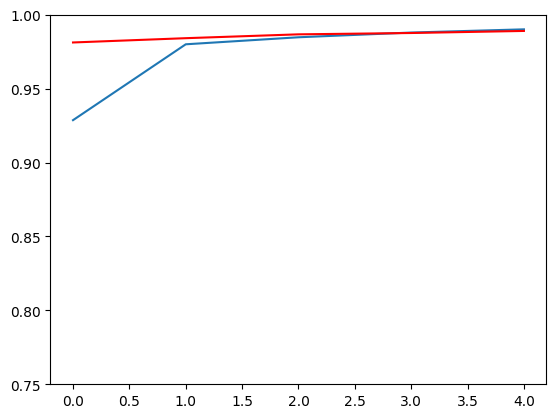

In [110]:
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'],'r')
plt.ylim(0.75,1.0)
plt.show()

313/313 [==============================] - 2s 6ms/step


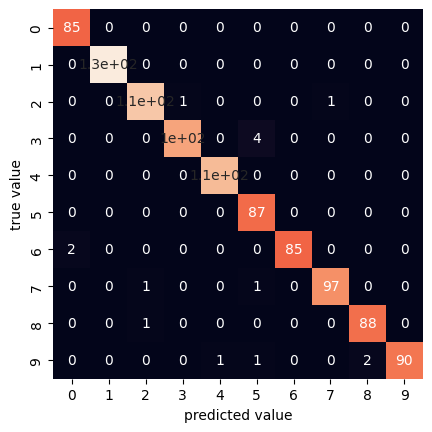

In [112]:
from sklearn.metrics import confusion_matrix
import seaborn as sns;
# Predict labels for test data
y_predicted_labels = cnn.predict(test_images_enhanced)
# Convert predicted labels to categorical format
y_predicted_labels = np.argmax(y_predicted_labels, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(test_labels[:1000], y_predicted_labels[:1000])

# print the confusion matrix
sns.heatmap(cm, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');


**OPDRACHT**: evalueer je resultaten:

* hoe is de nauwkeurigheid?
* is het netwerk onder- of over-trained?
* laat een paar fouten zien
 * wat kun je zeggen over de aard van de fouten?
* wat is sneller: het trainen of het testen?
* wat kun je nog doen om de nauwkeurigheid te verhogen?

(noteer de veranderingen die je hebt aangebracht en wat daar de resultaten van zijn)

**Hoe is de nauwkeurigheid?**
De nauwkeurigheid is erg hoog, namelijk 99,01 procent.

**Is het netwerk onder- of over-getraind?**
In dit geval is het netwerk niet over getrained en niet onder getrained, bij overfitting zou de accuratie veel hoger dan de validatie moeten zijn en bij underfitting juist andersom. In dit geval liggen de lijnen vlak bij elkaar, waarbij de lijn van accuratie hoger is dan die van de validatie.

**Laat een paar fouten zien en wat kun je zeggen over de aard van de fouten?** 
Een paar fouten zou je kunnen zien uit de extra heatmap, hier zie je dat de prediction een 5 was maar de true value een 3.
Dit zie je ook bij prediction 6 en actual 0.

**Wat is sneller: het trainen of het testen?**
Over het algemeen is testen sneller dan trainen. Tijdens het testen hoeft het model niet te leren, maar alleen voorspellingen te doen op basis van de geleerde gewichten en parameters.

**Wat kun je nog doen om de nauwkeurigheid te verhogen?**
Er zijn verschillende dingen die de nauwkeurigheid kan verhogen, zoals het toevoegen van meer trainingsgegevens, het veranderen van de architectuur van het model, het fine-tunen van de hyperparameters, data-augmentatie toepassen, enzovoort.

## To do: evalueer cijferherkenning met kNN, NN, en CNN

**OPDRACHT**: evalueer je resultaten:

vergelijk de resultaten van kNN, NN, en CNN

* wat concludeer je hieruit?
* welke type fouten maken de verschillende classifiers?




k-Nearest Neighbors (kNN): kNN is eenvoudig te implementeren en begrijpen. Het presteert redelijk goed op MNIST, maar kan moeite hebben met grotere datasets vanwege de computationele complexiteit. Het kan moeite hebben met het generaliseren van complexe patronen.

Neuraal Netwerk (NN): Een eenvoudig neuraal netwerk kan betere resultaten behalen dan kNN, vooral met betrekking tot complexe patronen. Het is echter gevoeliger voor overfitting en kan trainingstijd vergen, vooral op grote datasets zoals MNIST.

Convolutional Neural Network (CNN): CNN's zijn zeer geschikt voor het verwerken van afbeeldingsgegevens vanwege hun vermogen om ruimtelijke structuren te leren. Ze presteren over het algemeen beter dan traditionele NN-modellen en kNN op afbeeldingsclassificatietaken zoals MNIST. Ze hebben echter meer rekenkracht nodig voor training en inferentie.

Fouten die de verschillende classifiers kunnen maken, variëren afhankelijk van de aard van het algoritme en de kenmerken van de gegevens. Bijvoorbeeld:

kNN: kNN kan moeite hebben met het onderscheiden van klassen als de kenmerken niet goed zijn geschaald of als er veel ruis is in de gegevens. Het kan ook gevoelig zijn voor de keuze van het aantal buren (k).

NN: Neurale netwerken kunnen moeite hebben met het generaliseren van complexe patronen als het model te eenvoudig is of als er niet genoeg trainingsgegevens zijn. Overfitting is een veelvoorkomend probleem bij NN-modellen.

CNN: Convolutional Neural Networks kunnen fouten maken als de architectuur niet goed is ontworpen of als de hyperparameters niet goed zijn afgestemd. Ze kunnen ook gevoelig zijn voor overfitting, vooral bij een beperkte hoeveelheid trainingsgegevens.

### To do: Upload de notebooks naar je Gitlab, maak een aantekening in je logboek, werk Bloom-tabel bij.